In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] ="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [26]:
df = pd.read_excel("./data/출산율.xlsx",skiprows=[0,1],nrows=2,index_col=0)
df

c:\source\pythonsource\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 출생아 수 to 합계 출산율
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2012    2 non-null      float64
 1   2013    2 non-null      float64
 2   2014    2 non-null      float64
 3   2015    2 non-null      float64
 4   2016    2 non-null      float64
 5   2017    2 non-null      float64
 6   2018    2 non-null      float64
 7   2019    2 non-null      float64
 8   2020    2 non-null      float64
 9   2021    2 non-null      float64
dtypes: float64(10)
memory usage: 176.0+ bytes


In [28]:
df.columns

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [29]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

##### 데이터 전처리

In [30]:
df = df.T
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808


In [36]:
print(df.columns)
df.columns.values

Index(['출생아 수', '합계 출산율'], dtype='object')


array(['출생아 수', '합계 출산율'], dtype=object)

In [35]:
# 컬럼명 변경
df.columns = ["출생아 수", "합계 출산율"]
# df.replace(columns = {"출생아\xa0수":"출생아수","합계\xa0출산율":"합계 출산율"},inplace=True)

##### 시각화

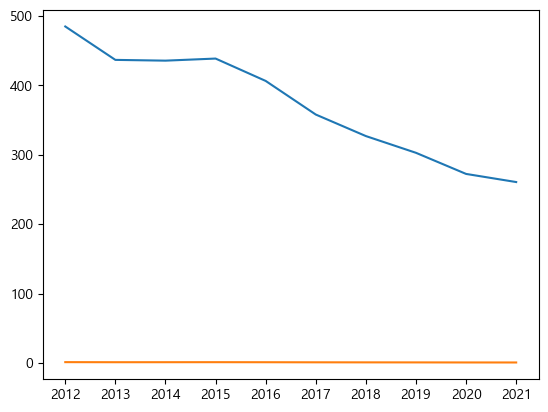

In [37]:
# 출생아 수,  합계출산율 선 차트
plt.plot(df["출생아 수"])
plt.plot(df["합계 출산율"])


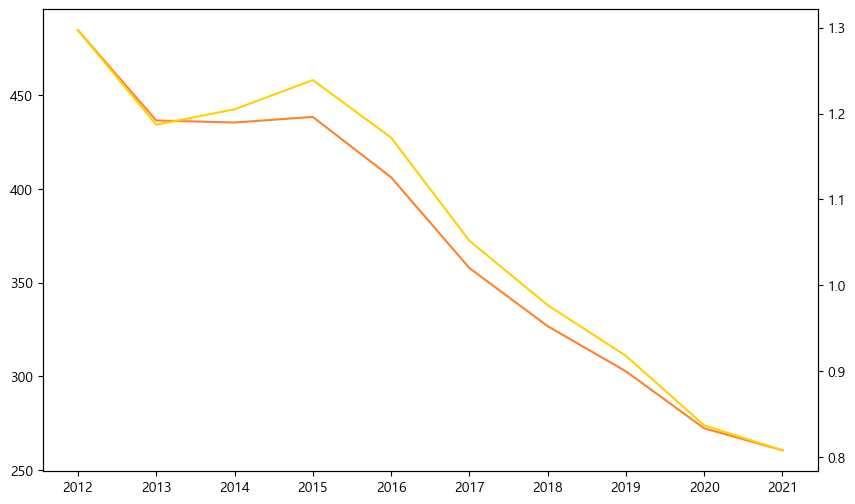

In [41]:
# 보조축 설정

fig, axes = plt.subplots(figsize=(10,6))
axes.plot(df["출생아 수"],color="#ff812d")

axes2 = axes.twinx()    # x축 공유
axes2.plot(df["합계 출산율"],color="#ffd100")

plt.show()

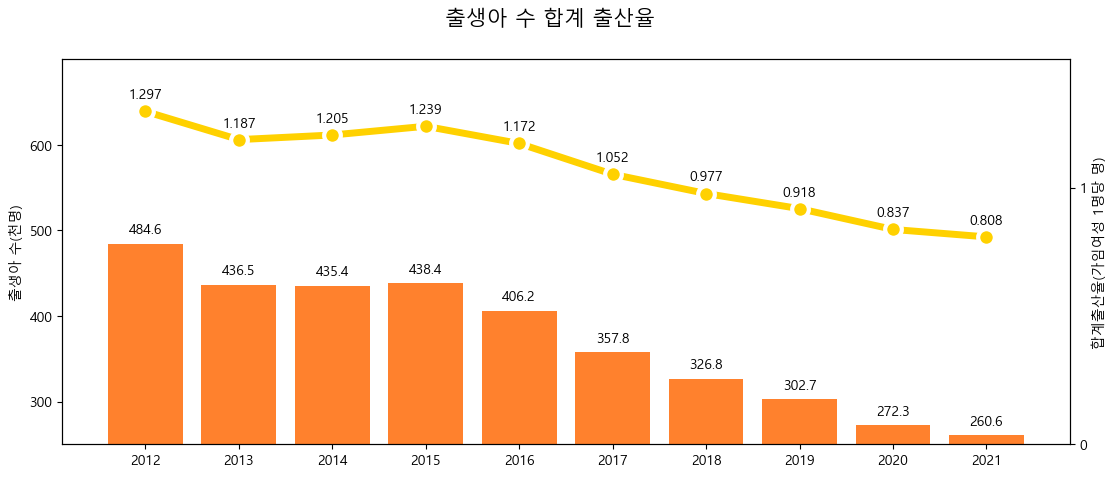

In [52]:
fig, axes = plt.subplots(figsize=(13,5))
axes.set_ylabel("출생아 수(천명)")
axes.set_ylim(250,700)
axes.set_yticks([300,400,500,600])
axes.bar(df.index, df["출생아 수"],color="#ff812d")

# bar 숫자 표시
for idx, val in enumerate(df["출생아 수"]):
    axes.text(idx,val+12,val,ha="center")

axes2 = axes.twinx()    # x축 공유
axes2.plot(df["합계 출산율"],color="#ffd100",marker="o",ms=12,lw=5,mec="w",mew=3)
axes2.set_ylabel("합계출산율(가임여성 1명당 명)")
axes2.set_ylim(0,1.5)
axes2.set_yticks([0,1])

# 꺽은선 숫자 보여주기
for idx, val in enumerate(df["합계 출산율"]):
    axes2.text(idx,val+0.05,val,ha="center")

fig.suptitle("출생아 수 합계 출산율",fontsize=15)

plt.show()